# Deep Learning - imbd

### Van: Mart Veldkamp

# Inhoudsopgave

1. [Inleiding](#1)
2. [Het probleem](#2)
3. [Library's laden + data ophalen](#3)
    - [Versie's van de verschillende library's](#4)
    - [Data ophalen](#5)
4. [Embedding](#6)
    - [Conclusie Embedding](#7)
5. [Maak test images](#8)
6. [1D Convolutie](#9)
    - [Conclusie 1D convolutie](#10)
7. [Eenvoudig RNN](#11)
    - [Conclusie RNN](#12)
8. [LSTM](#13)
    - [Conclusie LSTM](#14)
9. [Combineer Conv1D en LSTM](#15)
    - [Conclusie Conv1D met LSTM](#16)
10. [Bidirectional](#17)
    - [Conclusie Bidirectional](#18)
11. [Bronnen](#19)

# 1. Inleiding <a class='anchor' id='1'></a>

Deze opdracht is onderdeel van het overkoepelende vak Deep Learning, dit is één van de meerdere opgaves die ik gebruik in dit vak om te laten zien hoe deep learning gebruikt kan worden voor verschillende doeleinde. Al deze opgaves zijn daarom ook op de lossen door middel van Deep Learning.

Alle code in deze opdrachten zijn van mijzelf, gebasseerd op code uit de lessen, of waar ik zelf vast liep gebaseerd op code snippets van het internet. Mocht het toch voorkomen dat er code 1 op 1 is overgenomen, dan staat dit vermeld in de bronnen

# 2. Het probleem <a class='anchor' id='2'></a>

Het probleem dat ik in deze notebook ga behandelen is het classificeren van recensies aan de hand van of een review veel woorden heeft wat gezien wordt als slecht of als goed. Dit gaan we met heel veel verschillende soorten modellen doen om zo te kijken welke nou uiteindelijk het beste werkt. Dit worden lezen wordt gedaan door middel van in de zien te kijken naar bijvoorbeeld een woord zoals "slecht" of "Leuk". Maar je kan je voorstellen dat er ook kon staan "niet slecht" of "Alles behalve leuk". Daarom moeten we goed kijken naar de context waarin deze woorden staan. En daar mee gaan spelen.

# 3. Library's laden + data ophalen <a class='anchor' id='3'></a>

In [133]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Flatten, Dense

## Versie's van de verschillende library's <a class='anchor' id='4'></a>

In [134]:
print("Versie van PandaS:", pd.__version__)
print("Versie van Numpy:", np.__version__)

Versie van PandaS: 1.3.4
Versie van Numpy: 1.19.5


## data ophalen <a class='anchor' id='5'></a>

In [135]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
maxlen = 60 # gebruik alleen de eerste x woorden van iedere review

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

# gebruik alleen de eerste 20 woorden
# vul sequences korter dan 20 woorden aan met nullen
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen = maxlen)

number_of_examples = 10000

x_val_set = x_train[:number_of_examples]
x_train_set = x_train[number_of_examples:]

y_val_set = y_train[:number_of_examples]
y_train_set = y_train[number_of_examples:]

# 4. Embedding <a class='anchor' id='6'></a>

We trainen een embedding layer in combinatie met een Dense netwerk.

In [136]:
from keras.layers import Embedding

model = Sequential()
model.add(Embedding(10000, 6, input_length = maxlen))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))


In [137]:
def compile(model, opt = 'rmsprop', loss = 'binary_crossentropy'):
    model.compile(optimizer = opt,
                  metrics = ['acc'],
                 loss = loss)

    model.summary()
    
compile(model)

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 60, 6)             60000     
_________________________________________________________________
flatten_9 (Flatten)          (None, 360)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 361       
Total params: 60,361
Trainable params: 60,361
Non-trainable params: 0
_________________________________________________________________


In [138]:
def fit(model, epochs = 5, batch_size = 32):
    return model.fit(x_train_set, y_train_set,
                     epochs = epochs,
                     batch_size = batch_size,
                     validation_data = (x_val_set, y_val_set))

history = fit(model)

Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 0.6645 - acc: 0.6448 - val_loss: 0.6016 - val_acc: 0.7372
Epoch 2/5
469/469 [==============================] - 0s 926us/step - loss: 0.5023 - acc: 0.7929 - val_loss: 0.4571 - val_acc: 0.7987
Epoch 3/5
469/469 [==============================] - 0s 950us/step - loss: 0.3861 - acc: 0.8393 - val_loss: 0.4024 - val_acc: 0.8182
Epoch 4/5
469/469 [==============================] - 0s 931us/step - loss: 0.3294 - acc: 0.8639 - val_loss: 0.3836 - val_acc: 0.8272
Epoch 5/5
469/469 [==============================] - 0s 948us/step - loss: 0.2940 - acc: 0.8775 - val_loss: 0.3772 - val_acc: 0.8319


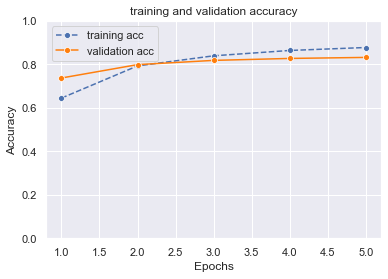

In [139]:
def plot_learning_curves(history):
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    sns.set_theme(style="darkgrid")
    sns.lineplot(x=epochs, y=acc, label='training acc', color="b", linestyle="dashed", marker="o")
    sns.lineplot(x=epochs, y=val_acc, label='validation acc', color='tab:orange', marker="o")
    plt.title('training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0,1)
    plt.legend()

    plt.show()
    
plot_learning_curves(history)

## Conclusie Embedding <a class='anchor' id='7'></a>

Na meerdere iteraties kwam ik erachter dat hoe kleiner ik de embedding laag maak, hoe beter het model werkt. En daarna heb ik de maxlen die het model afleest per review verhoogt. Om zo meer mee te nemen van de reviews. Uiteindelijk kwam ik op een accuracy van 83% (Beste run). En denk dat er met embedding ook niet veel meer uit te halen valt.

# 5. Maak test images <a class='anchor' id='8'></a>

We maken hier test images om te experimenteren met een netwerk met een Embedding en éénn of meer `Conv1D' lagen. Om te kijken wat het resultaat dan is.

In [140]:
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D

model = Sequential()
model.add(Embedding(10000, 16, input_length = maxlen))
model.add(Conv1D(32, 5, activation = 'relu'))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

In [141]:
compile(model)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 60, 16)            160000    
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 56, 32)            2592      
_________________________________________________________________
flatten_10 (Flatten)         (None, 1792)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 1793      
Total params: 164,385
Trainable params: 164,385
Non-trainable params: 0
_________________________________________________________________


# 6. 1D convolutie <a class='anchor' id='9'></a>

In [142]:
history = fit(model)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.5538 - acc: 0.6925 - val_loss: 0.4013 - val_acc: 0.8170
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.3448 - acc: 0.8468 - val_loss: 0.3799 - val_acc: 0.8277
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2894 - acc: 0.8763 - val_loss: 0.3800 - val_acc: 0.8293
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2561 - acc: 0.8937 - val_loss: 0.3918 - val_acc: 0.8274
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.2322 - acc: 0.9067 - val_loss: 0.4086 - val_acc: 0.8238


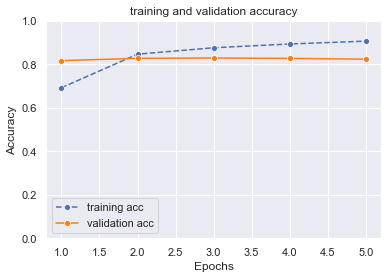

In [143]:
plot_learning_curves(history)

## Conclusie 1D Convolutie <a class='anchor' id='10'></a>

De conclusie dat we hieruit kunnen trekken is dat er niet een erg groot verschil zit tussen de embedding laag en de conv1d laag. Bij de aller eerste iteratie zat er nog een max pooling en conv1D laag tussen. En deze zijn er uit gehaald voor betere resultaten. De uiteindelijke accuracy is: 83.21%

# 7. Eenvoudig RNN <a class='anchor' id='11'></a>

Experimenteer met een netwerk met een Embedding en een of meer `SimpleRNN' lagen.

In [206]:
from keras.layers import SimpleRNN
from keras.layers import GaussianNoise

model = Sequential()
model.add(Embedding(10000, 8, input_length = maxlen))
model.add(SimpleRNN(12, return_sequences = True))
model.add(GaussianNoise(0.4))
model.add(SimpleRNN(24))
model.add(Dense(1, activation = 'sigmoid'))

In [207]:
compile(model)

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_35 (Embedding)     (None, 60, 8)             80000     
_________________________________________________________________
simple_rnn_36 (SimpleRNN)    (None, 60, 12)            252       
_________________________________________________________________
gaussian_noise_6 (GaussianNo (None, 60, 12)            0         
_________________________________________________________________
simple_rnn_37 (SimpleRNN)    (None, 24)                888       
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 25        
Total params: 81,165
Trainable params: 81,165
Non-trainable params: 0
_________________________________________________________________


In [208]:
history = fit(model)

Epoch 1/5
469/469 [==============================] - 10s 19ms/step - loss: 0.7044 - acc: 0.5062 - val_loss: 0.6916 - val_acc: 0.5226
Epoch 2/5
469/469 [==============================] - 9s 19ms/step - loss: 0.5831 - acc: 0.6817 - val_loss: 0.5268 - val_acc: 0.7472
Epoch 3/5
469/469 [==============================] - 9s 18ms/step - loss: 0.4209 - acc: 0.8167 - val_loss: 0.4996 - val_acc: 0.7867
Epoch 4/5
469/469 [==============================] - 8s 18ms/step - loss: 0.3512 - acc: 0.8563 - val_loss: 0.4298 - val_acc: 0.8038
Epoch 5/5
469/469 [==============================] - 9s 19ms/step - loss: 0.3066 - acc: 0.8767 - val_loss: 0.4459 - val_acc: 0.8124


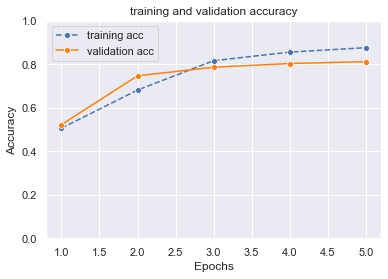

In [209]:
plot_learning_curves(history)

## Conclusie RNN <a class='anchor' id='12'></a>
 
Bij de Recurrent neural network (RNN) zie je dat deze zoals misschien voorspeld hetzelfde resultaat geeft als bij de vorige, en dat is dat er teveel getrained wordt voor het probleem wat je wil oplossen. Er kan eventueel verdere tests gedaan worden met lagere Epochs om zo te kijken of de validatie set (wat ik een beetje zie als kleine test set) hoger uitkomt.

# 8. LSTM <a class='anchor' id='13'></a>

Experimenteer met een netwerk met een embedding en een of meer LSTM lagen.

In [210]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(10000, 16, input_length = maxlen))
model.add(GaussianNoise(0.4))
model.add(LSTM(32, return_sequences = True, dropout = 0.2, recurrent_dropout = 0.2))
model.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = 'sigmoid'))

In [211]:
compile(model)

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_36 (Embedding)     (None, 60, 16)            160000    
_________________________________________________________________
gaussian_noise_7 (GaussianNo (None, 60, 16)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 60, 32)            6272      
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 33        
Total params: 174,625
Trainable params: 174,625
Non-trainable params: 0
_________________________________________________________________


In [212]:
history = fit(model)

Epoch 1/5
469/469 [==============================] - 38s 74ms/step - loss: 0.6777 - acc: 0.5579 - val_loss: 0.5817 - val_acc: 0.6971
Epoch 2/5
469/469 [==============================] - 35s 75ms/step - loss: 0.5982 - acc: 0.6768 - val_loss: 0.4828 - val_acc: 0.7834
Epoch 3/5
469/469 [==============================] - 35s 75ms/step - loss: 0.5324 - acc: 0.7357 - val_loss: 0.4284 - val_acc: 0.8053
Epoch 4/5
469/469 [==============================] - 35s 75ms/step - loss: 0.4852 - acc: 0.7657 - val_loss: 0.4132 - val_acc: 0.8163
Epoch 5/5
469/469 [==============================] - 36s 76ms/step - loss: 0.4482 - acc: 0.7933 - val_loss: 0.4188 - val_acc: 0.8012


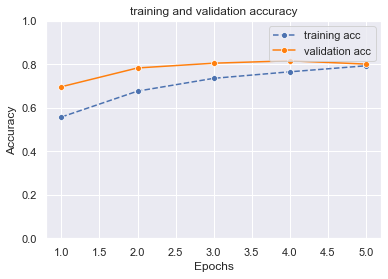

In [213]:
plot_learning_curves(history)

## Conclusie LSTM <a class='anchor' id='14'></a>

Dit heeft een erg mooie plot, niet erg handig. Ik heb wat ruis toegevoegd om ervoor te zorgen dat het model niet teveel traind op de trainingsset. En door deze toevoeging is het model van een accuracy van 76% naar 81% gegaan.

# 9. Combineer Conv1D en LSTM <a class='anchor' id='15'></a>

In [230]:
model = Sequential()
model.add(Embedding(10000, 16, input_length = maxlen))
model.add(GaussianNoise(0.35))
model.add(Conv1D(16, 5, activation = 'relu'))
model.add(MaxPooling1D(3))
model.add(Conv1D(24, 5, activation = 'relu'))
model.add(LSTM(24))
model.add(Dense(1, activation = 'sigmoid'))

In [231]:
compile(model)

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_41 (Embedding)     (None, 60, 16)            160000    
_________________________________________________________________
gaussian_noise_12 (GaussianN (None, 60, 16)            0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 56, 16)            1296      
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 18, 16)            0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 14, 24)            1944      
_________________________________________________________________
lstm_10 (LSTM)               (None, 24)                4704      
_________________________________________________________________
dense_38 (Dense)             (None, 1)               

In [232]:
history = fit(model)

Epoch 1/5
469/469 [==============================] - 6s 10ms/step - loss: 0.6924 - acc: 0.5156 - val_loss: 0.6804 - val_acc: 0.6685
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.6339 - acc: 0.6391 - val_loss: 0.5689 - val_acc: 0.7426
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5563 - acc: 0.7131 - val_loss: 0.4971 - val_acc: 0.7768
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5030 - acc: 0.7537 - val_loss: 0.4599 - val_acc: 0.7951
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.4656 - acc: 0.7816 - val_loss: 0.4402 - val_acc: 0.8020


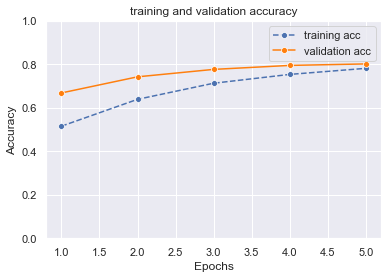

In [233]:
plot_learning_curves(history)

## Conclusie Conv1D met LSTM <a class='anchor' id='16'></a>

Door middel van nog maals noise toe te voegen heb ik de accuracy omhoog gekregen van 74% naar 80%. Dit is een 6% verhoging wat mooi is. In vergelijking met andere modellen vind ik het niet zo super hoog. Het mooie wat je hier ziet is dat de validatie set steeds hoger is dan de training set als je kijkt naar de accuracy. Dit is opvallend omdat meestal de trainingsset hoger is. Dit kan komen door de noise. Waardoor in de trainingsset er minder hoge accuracy is, maar daardoor wordt er ook minder overtrained. Wat leidt tot een hoge validatie accuracy.

# 10. bidirectional <a class='anchor' id='17'></a>

In [246]:
from keras.layers import Bidirectional

model = Sequential()
model.add(Embedding(10000, 32, input_length = maxlen))
model.add(GaussianNoise(0.4))
model.add(Conv1D(32, 5, activation = 'relu'))

model.add(Bidirectional(LSTM(32)))

model.add(Dense(1, activation = 'sigmoid'))

In [247]:
compile(model)

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_45 (Embedding)     (None, 60, 32)            320000    
_________________________________________________________________
gaussian_noise_16 (GaussianN (None, 60, 32)            0         
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 56, 32)            5152      
_________________________________________________________________
bidirectional_4 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 65        
Total params: 341,857
Trainable params: 341,857
Non-trainable params: 0
_________________________________________________________________


In [248]:
history = fit(model)

Epoch 1/5
469/469 [==============================] - 15s 28ms/step - loss: 0.6832 - acc: 0.5461 - val_loss: 0.6118 - val_acc: 0.7396
Epoch 2/5
469/469 [==============================] - 12s 27ms/step - loss: 0.5726 - acc: 0.7064 - val_loss: 0.4794 - val_acc: 0.7745
Epoch 3/5
469/469 [==============================] - 12s 26ms/step - loss: 0.4944 - acc: 0.7615 - val_loss: 0.4353 - val_acc: 0.8093
Epoch 4/5
469/469 [==============================] - 13s 27ms/step - loss: 0.4383 - acc: 0.7948 - val_loss: 0.4058 - val_acc: 0.8201
Epoch 5/5
469/469 [==============================] - 13s 27ms/step - loss: 0.4084 - acc: 0.8148 - val_loss: 0.3905 - val_acc: 0.8232


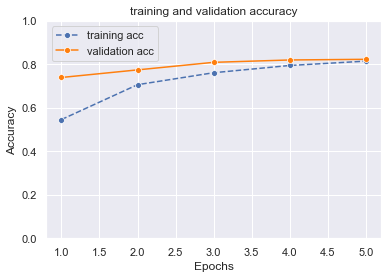

In [249]:
plot_learning_curves(history)

## Conclusie Bidirectional <a class='anchor' id='18'></a>

Wat je kan zien bij Bidirectional is dat de val accuracy een toppunt heeft van rond de 83%, wat 6% hoger is dan een base line Bidirectional netwerk. Wat redelijk goed is. Net zoals bij de Conv1D met LSTM model zie je een mooie relatie tussen de validatie en trainings acc. 

# 11. Bronnen <a class='anchor' id='19'></a>

- [Verschil Bidirectional LSTM en LSTM](https://stackoverflow.com/questions/43035827/whats-the-difference-between-a-bidirectional-lstm-and-an-lstm)
- [LSTM explained](https://machinelearningmastery.com/gentle-introduction-long-short-term-memory-networks-experts/)
- [Conv1D layer explained](https://towardsdatascience.com/understanding-1d-and-3d-convolution-neural-network-keras-9d8f76e29610)